In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Adding 2 dice rolls
## Using a table
|   | 1 | 2 | 3 | 4  | 5  | 6  |
| - | - | - | - | -- | -- | -- |
| 1 | 2 | 3 | 4 | 5  | 6  | 7  |
| 2 | 3 | 4 | 5 | 6  | 7  | 8  |
| 3 | 4 | 5 | 6 | 7  | 8  | 9  |
| 4 | 5 | 6 | 7 | 8  | 9  | 10 |
| 5 | 6 | 7 | 8 | 9  | 10 | 11 |
| 6 | 7 | 8 | 9 | 10 | 11 | 12 |
## PMF
|x|2|3|4|5|6|7|8|9|10|11|12|
|-|-|-|-|-|-|-|-|-|-|-|-|
|P(X=x)|1/36|2/36|3/36|4/36|5/36|6/36|5/36|4/36|3/36|2/36|1/36|

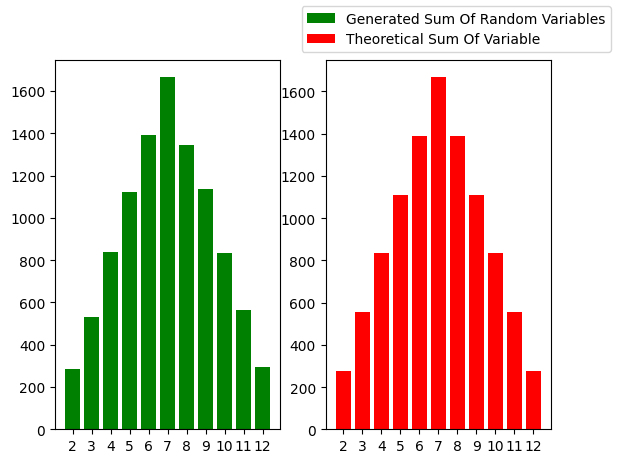

In [3]:
xk = np.arange(1, 7)
pk = np.full(len(xk), 1/len(xk))

dice = stats.rv_discrete(name="dice", values=(xk, pk))

# Generating n samples and plotting its frequency
n = 10_000
generated_rolls = dice.rvs(size=n)+dice.rvs(size=n)
unique, frequency = np.unique(generated_rolls, return_counts=True)

fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].bar(unique, frequency, label="Generated Sum Of Random Variables",color="green")

# Theoretical distribution using convolutions
ax[1].bar(np.arange(np.min(xk)*2, np.max(xk)*2 + 1, 1), np.convolve(pk,pk)*n, label="Theoretical Sum Of Variable", color="red")
ax[0].set_xticks(ticks=unique)
ax[1].set_xticks(ticks=np.arange(np.min(xk)*2, np.max(xk)*2 + 1, 1))
fig.legend()

# Adding 2 Arbitrary Random Discrete Variables

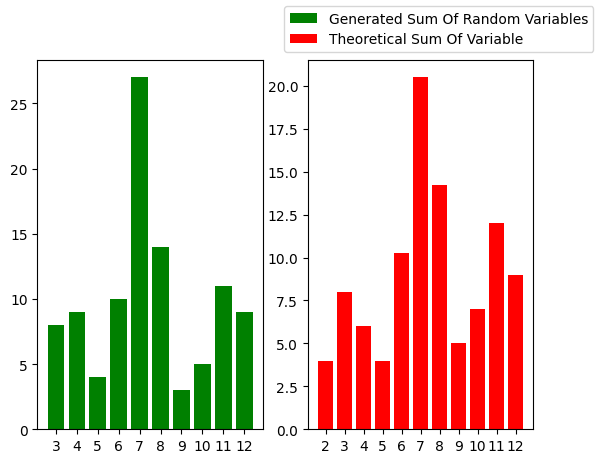

In [ ]:
xk = np.arange(1, 7)
pk = [0.2, 0.2, 0.05, 0.05, 0.2, 0.3]

dice = stats.rv_discrete(name="dice", values=(xk, pk))

# Generating n samples and plotting its frequency
n = 100
generated_rolls = dice.rvs(size=n)+dice.rvs(size=n)
unique, frequency = np.unique(generated_rolls, return_counts=True)

fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].bar(unique, frequency, label="Generated Sum Of Random Variables",color="green")

# Theoretical distribution using convolutions
ax[1].bar(np.arange(np.min(xk)*2, np.max(xk)*2 + 1, 1), np.convolve(pk,pk)*n, label="Theoretical Sum Of Variables", color="red")
ax[0].set_xticks(ticks=unique)
ax[1].set_xticks(ticks=np.arange(np.min(xk)*2, np.max(xk)*2 + 1, 1))
fig.legend()

# Adding 2 Binomial Variables


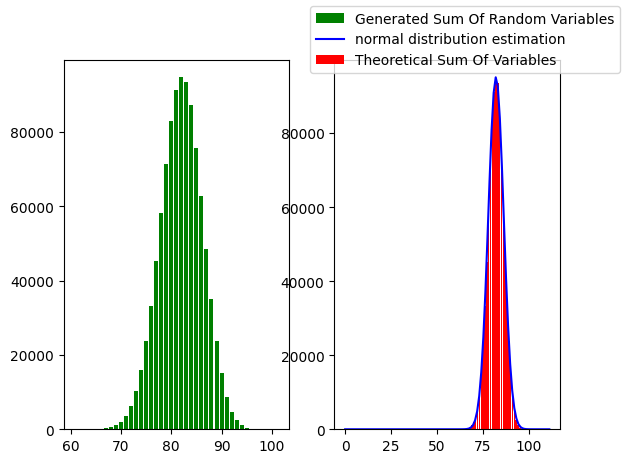

In [38]:
n_1 = 10
n_2 = 100
p_1 = 0.2
p_2 = 0.8





binom_rv_1 = stats.binom(n_1, p_1)
binom_rv_2 = stats.binom(n_2, p_2)
# Generating n samples and plotting its frequency
n = 1_000_000
generated_rolls = binom_rv_1.rvs(size=n)+binom_rv_2.rvs(size=n)
unique, frequency = np.unique(generated_rolls, return_counts=True)

fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].bar(unique, frequency, label="Generated Sum Of Random Variables",color="green")

# Theoretical distribution using convolutions
ax[1].bar(np.arange(0, n_1 + n_2 + 1, 1), np.convolve(binom_rv_1.pmf(np.arange(0, n_1+1, 1)), binom_rv_2.pmf(np.arange(0, n_2+1, 1)))*n, label="Theoretical Sum Of Variables", color="red")

sum_norm = stats.norm(n_1*p_1+n_2*p_2, (p_1*(1-p_1)*n_1 + p_2*(1-p_2)*n_2)**0.5)
x_norm = np.linspace(0, n_1 + n_2 +1, 100)
ax[1].plot(x_norm, sum_norm.pdf(x_norm)*n, label="normal distribution estimation", color="blue")
fig.legend()

# The sum of 3 and more dice rolls

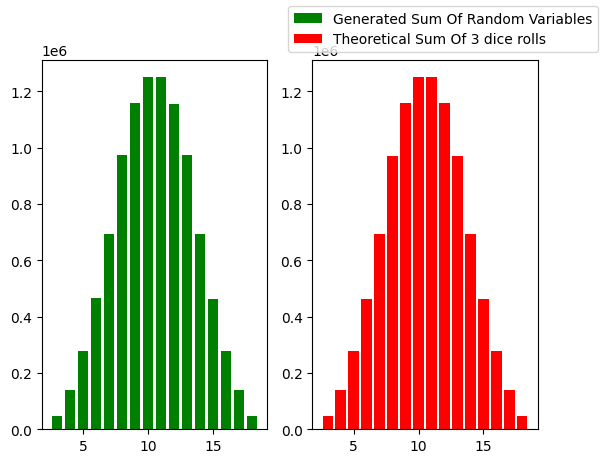

In [48]:
xk = np.arange(1, 7)
pk = np.full(len(xk), 1/len(xk))

dice = stats.rv_discrete(name="dice", values=(xk, pk))

# Generating n samples and plotting its frequency
n = 10_000_000
generated_rolls = dice.rvs(size=n)+dice.rvs(size=n)+dice.rvs(size=n)
unique, frequency = np.unique(generated_rolls, return_counts=True)

fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].bar(unique, frequency, label="Generated Sum Of Random Variables",color="green")
# ax[0].set_xticks(ticks=unique)




# Theoretical distribution using convolutions
ax[1].bar(np.arange(1*3, 6*3+1, 1), np.convolve(np.convolve(dice.pmf(xk), dice.pmf(xk)), dice.pmf(xk))*n, label="Theoretical Sum Of 3 dice rolls", color="red")
fig.legend()